In [26]:
import pandas as pd


### reading movies.csv file


In [27]:
movie_data = pd.read_csv("movies.csv")

movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### are there any null values in movies.csv file ?

In [28]:
movie_data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

### number of comedy movies in our movies.csv file

In [29]:
comedy_movies = movie_data['genres'].str.contains('Comedy')

print(type(comedy_movies))

#print(comedy_movies)

comedy_movies = movie_data[comedy_movies]

comedy_movies.head()

print(type(comedy_movies))

print(comedy_movies.count())

print("so there are total 8374 comedy movies in movies.csv file...")

comedy_movies.head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
movieId    8374
title      8374
genres     8374
dtype: int64
so there are total 8374 comedy movies in movies.csv file...


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


### extracting years from movie title

In [30]:
movie_data['year of release'] = movie_data['title'].str.extract('.*\((.*)\).*', expand=True) 

movie_data.head()

,movieId,title,genres,year of release
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [31]:
# checking for null values in movie_data

print(movie_data.isnull().any()) #found null value in 'year of release' column

nullvalues = movie_data['year of release'].isnull()

print("rows which contains null values : \n")

print(movie_data[nullvalues])

print("\n",movie_data[nullvalues].count()) #so, there are 17 rows which contains null values

print('\n',movie_data.shape) #so , the shape before deleting null values is (27278, 4) 



movieId            False
title              False
genres             False
year of release     True
dtype: bool
rows which contains null values : 

       movieId                                  title                genres  \
10593    40697                              Babylon 5                Sci-Fi   
23617   112406  Brazil: In the Shadow of the Stadiums           Documentary   
23824   113190                     Slaying the Badger           Documentary   
24286   115133             Tatort: Im Schmerz geboren                 Crime   
24412   115685    National Theatre Live: Frankenstein         Drama|Fantasy   
26115   125571   The Court-Martial of Jackie Robinson    (no genres listed)   
26127   125632                          In Our Garden    (no genres listed)   
26180   125958     Stephen Fry In America - New World    (no genres listed)   
26335   126438         Two: The Story of Roman & Nyro     Documentary|Drama   
26395   126929                          Li'l Quinquin    (no g

In [32]:
movie_data = movie_data.dropna() #drop null values

print(movie_data.isnull().any()) #now there is no null values

print(movie_data.shape)

movieId            False
title              False
genres             False
year of release    False
dtype: bool
(27261, 4)


### grouping movies on the basis of year of release

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
                 title
year of release       
1891                 1
1893                 1
1894                 2
1895                 2
1896                 2
<class 'pandas.core.frame.DataFrame'>
              year of release     0
119                      2013  1011
120                      2014   740
121                      2015   120
122  Bicicleta, cullera, poma     1
123        Das Millionenspiel     1
                    0
year of release      
2011             1016
2012             1022
2013             1011
2014              740
2015              120


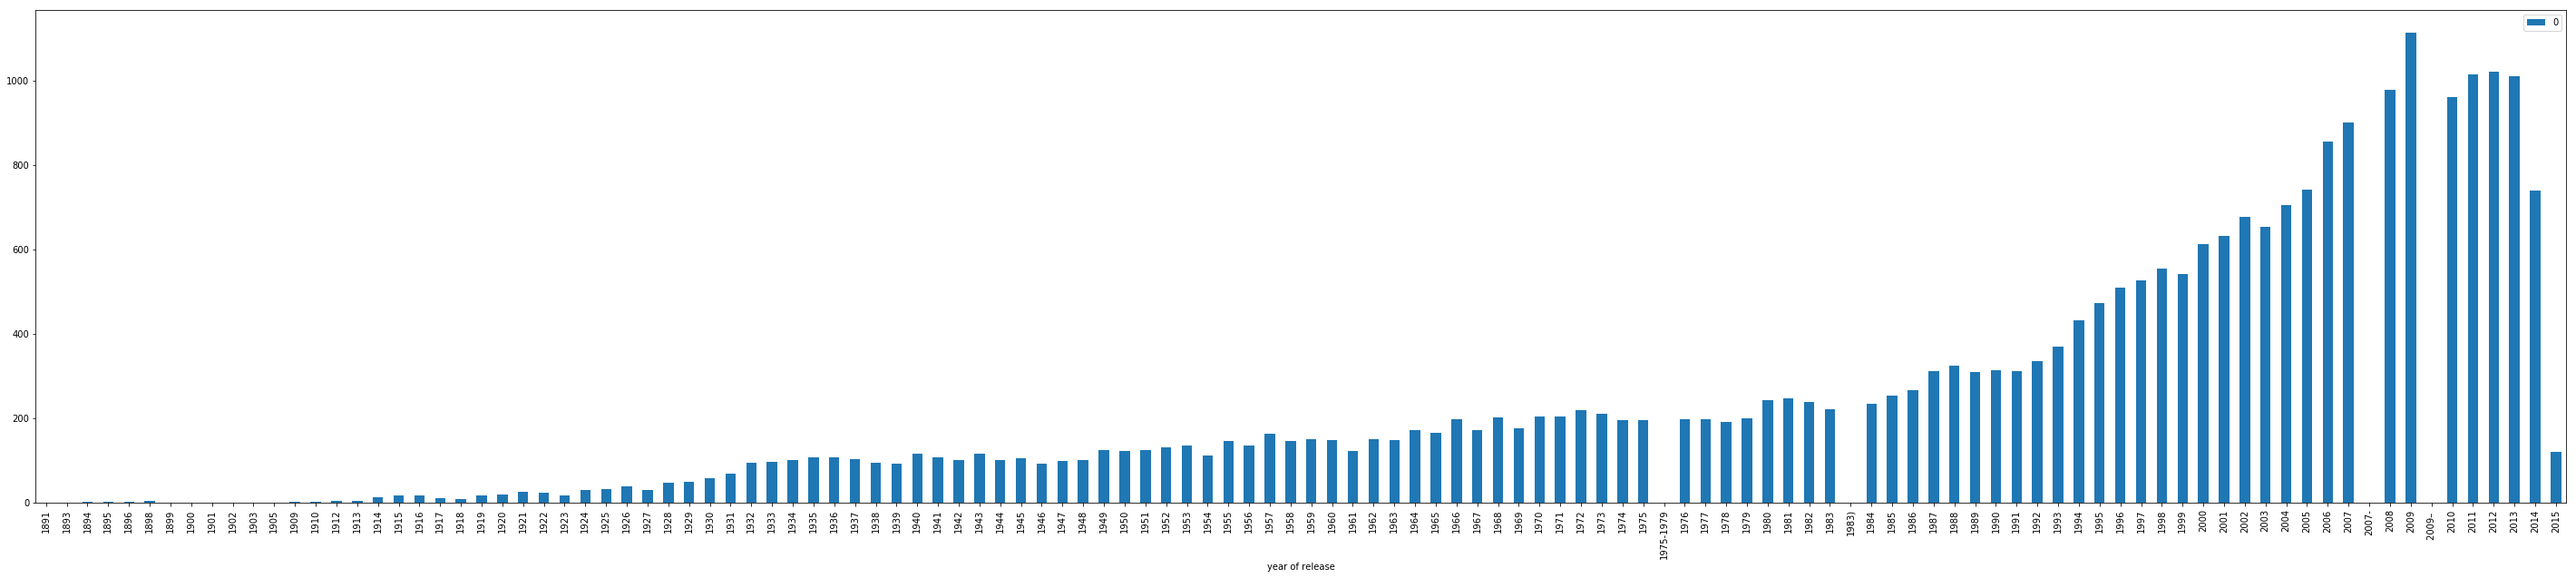

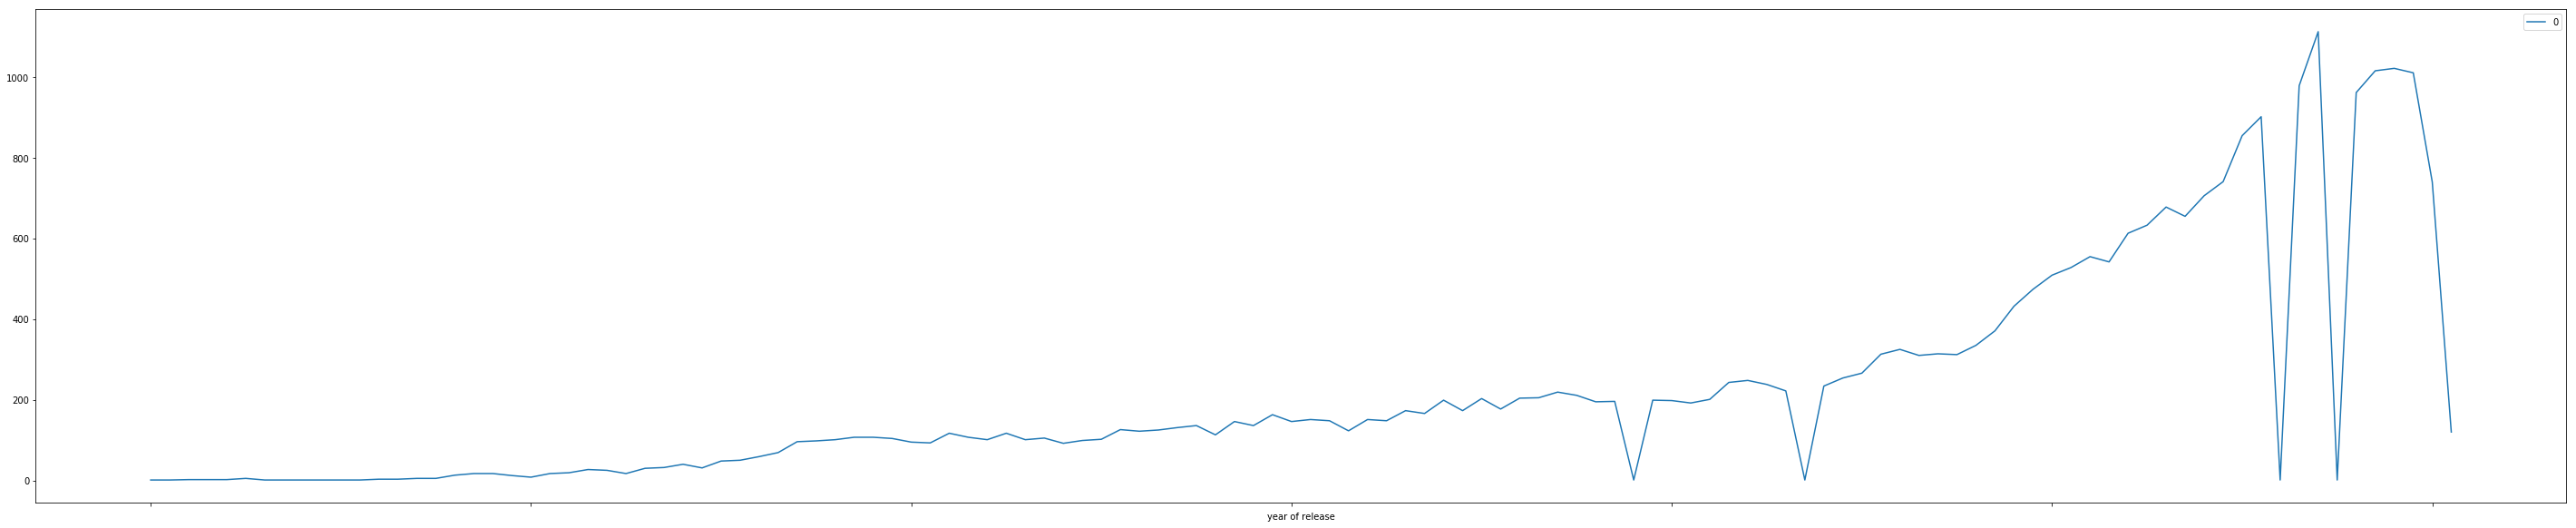

In [33]:

movie_years = movie_data[['title','year of release']].groupby('year of release')

print(type(movie_years))

print(movie_years.count().head())

movie_years_df = movie_years.size().to_frame().reset_index() #changing groupby into data frame

print(type(movie_years_df))

print(movie_years_df.tail())

movie_years_df = movie_years_df.drop(movie_years_df.index[[-1,-2]]) #drop last two rows of data frame 
                                                                    #because they were false values

movie_years_df.set_index('year of release', inplace=True) #setting 'year of release' as index

print(movie_years_df.tail())

movie_years_df.plot(kind='bar',figsize=(50,10))

movie_years_df.plot(figsize=(50,10))


### reading ratings.csv file

In [34]:
rating_data = pd.read_csv("ratings.csv")

rating_data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


### average rating

In [35]:
avg_rating = rating_data['rating'].mean()
print("average rating is ",avg_rating)

average rating is  3.5255285642993797


### minimum and maximum ratings and rating mostly given (mode())

In [36]:
min_rating = rating_data['rating'].min()

max_rating = rating_data['rating'].max()

mode_rating = rating_data['rating'].mode()

print('minimum rating : ',min_rating)

print('\nmaximum rating : ',max_rating)

print('\nrating given most number of times : ',float(mode_rating))


minimum rating :  0.5

maximum rating :  5.0

rating given most number of times :  4.0


In [37]:
group_rating = rating_data[['movieId','rating']].groupby('movieId')

group_rating = group_rating.mean()

#type(group_rating)

group_rating = group_rating.rename(columns={'rating': 'avg_rating'})

group_rating['minimum_rating'] = rating_data[['movieId','rating']].groupby('movieId').min()

group_rating['maximum_rating'] = rating_data[['movieId','rating']].groupby('movieId').max()

print(group_rating.head())

rating_movies_data = pd.merge(group_rating,movie_data,on='movieId',how='inner')

rating_movies_data.tail()

         avg_rating  minimum_rating  maximum_rating
movieId                                            
1          3.921240             0.5             5.0
2          3.211977             0.5             5.0
3          3.151040             0.5             5.0
4          2.861393             0.5             5.0
5          3.064592             0.5             5.0


,movieId,avg_rating,minimum_rating,maximum_rating,title,genres,year of release
26722,131254,4.0,4.0,4.0,Kein Bund für's Leben (2007),Comedy,2007
26723,131256,4.0,4.0,4.0,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
26724,131258,2.5,2.5,2.5,The Pirates (2014),Adventure,2014
26725,131260,3.0,3.0,3.0,Rentun Ruusu (2001),(no genres listed),2001
26726,131262,4.0,4.0,4.0,Innocence (2014),Adventure|Fantasy|Horror,2014


### avg rating in each year

                 avg_rating
year of release            
1891               3.000000
1893               3.375000
1894               3.071429
1895               3.125000
1896               3.183036


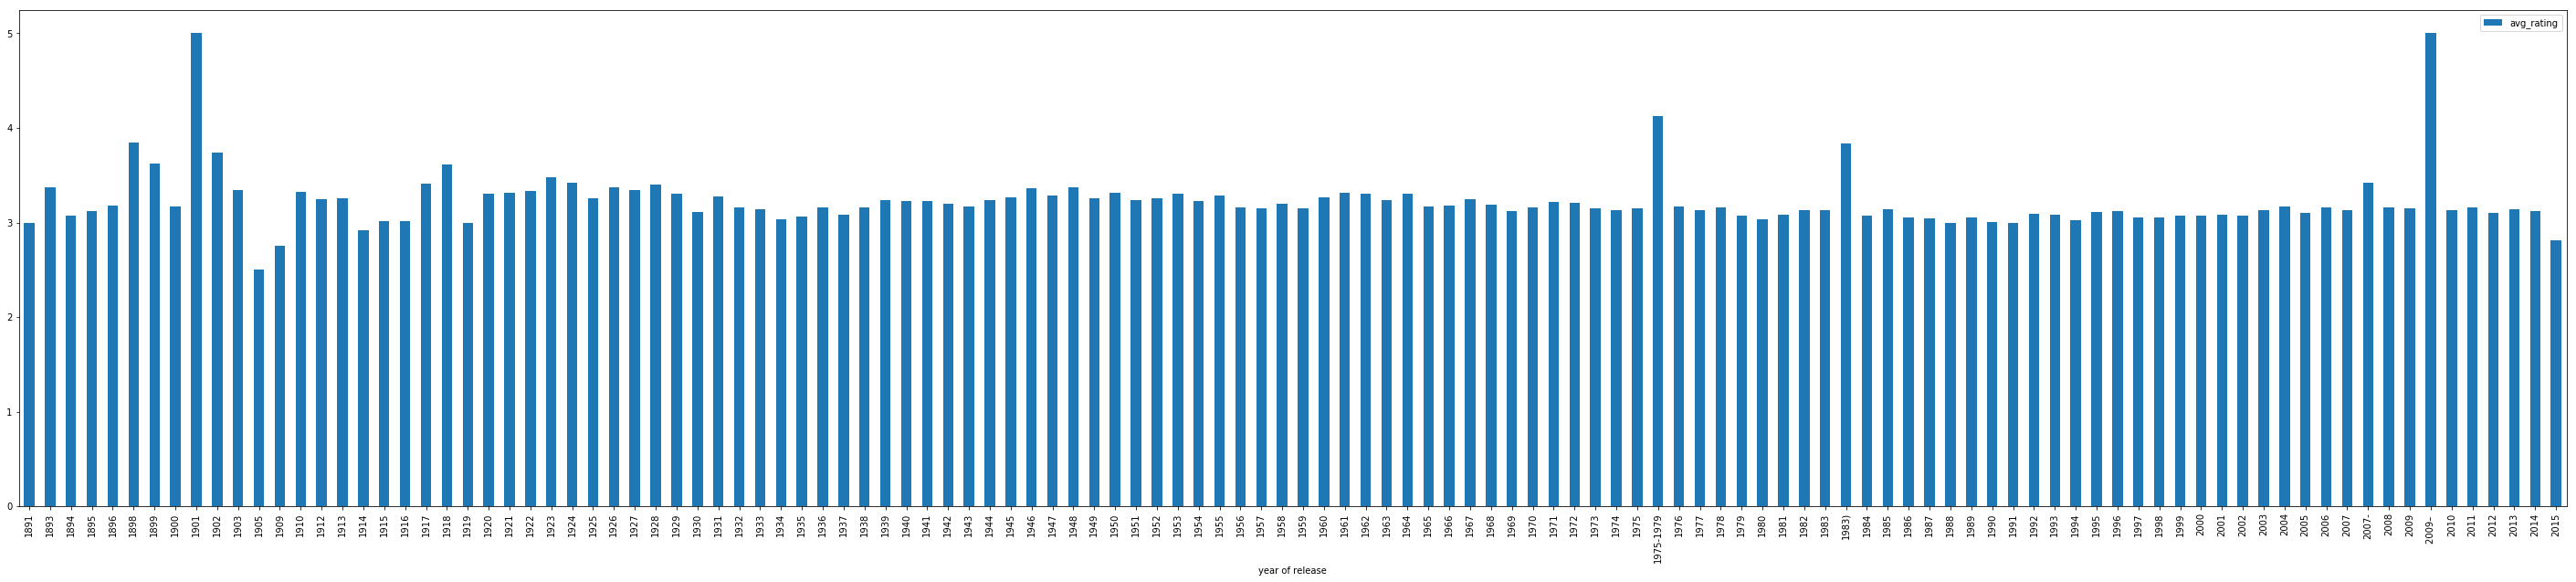

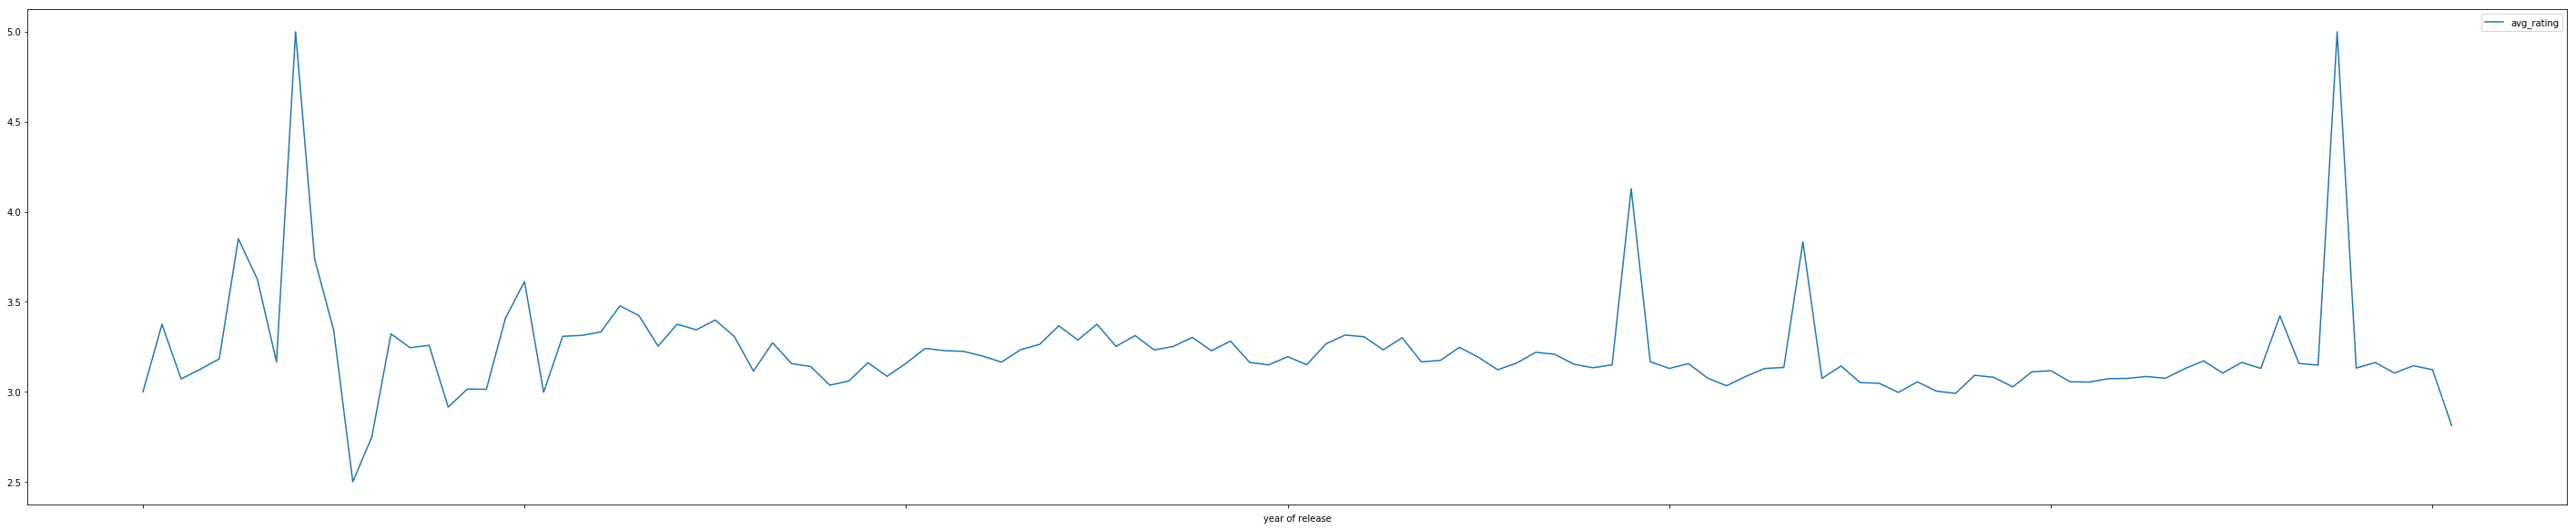

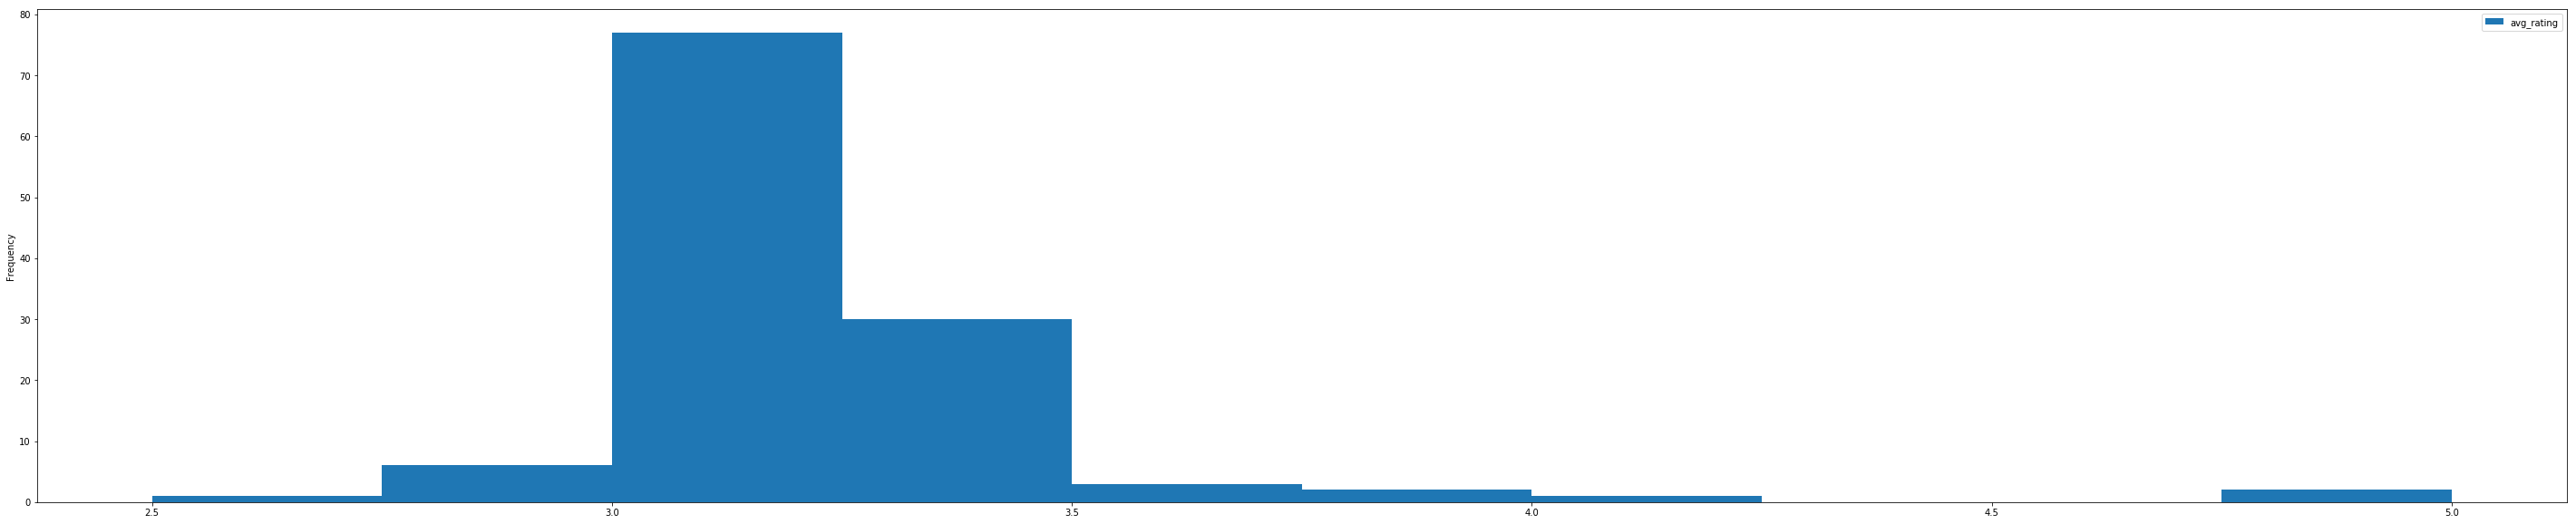

In [38]:
avg_rating_yarly = rating_movies_data[['avg_rating','year of release']].groupby('year of release')

avg_rating_yarly = avg_rating_yarly.mean()

avg_rating_yarly = avg_rating_yarly.drop(avg_rating_yarly.index[[-1,-2]]) #deleted last two rows because of false values

print(avg_rating_yarly.head())

avg_rating_yarly.plot(kind='bar',figsize=(50,10))

avg_rating_yarly.plot(figsize=(50,10))

avg_rating_yarly.plot(kind='hist',figsize=(50,10))

### avg rating of movies of horror genre in each year

In [39]:
horror_rating = rating_movies_data['genres'].str.contains('Horror')

horror_rating = rating_movies_data[horror_rating]

horror_rating.head()

,movieId,avg_rating,minimum_rating,maximum_rating,title,genres,year of release
11,12,2.619766,0.5,5.0,Dracula: Dead and Loving It (1995),Comedy|Horror,1995
21,22,3.319400,0.5,5.0,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,1995
69,70,3.277454,0.5,5.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1996
90,92,2.854103,0.5,5.0,Mary Reilly (1996),Drama|Horror|Thriller,1996
91,93,2.528739,0.5,5.0,Vampire in Brooklyn (1995),Comedy|Horror|Romance,1995


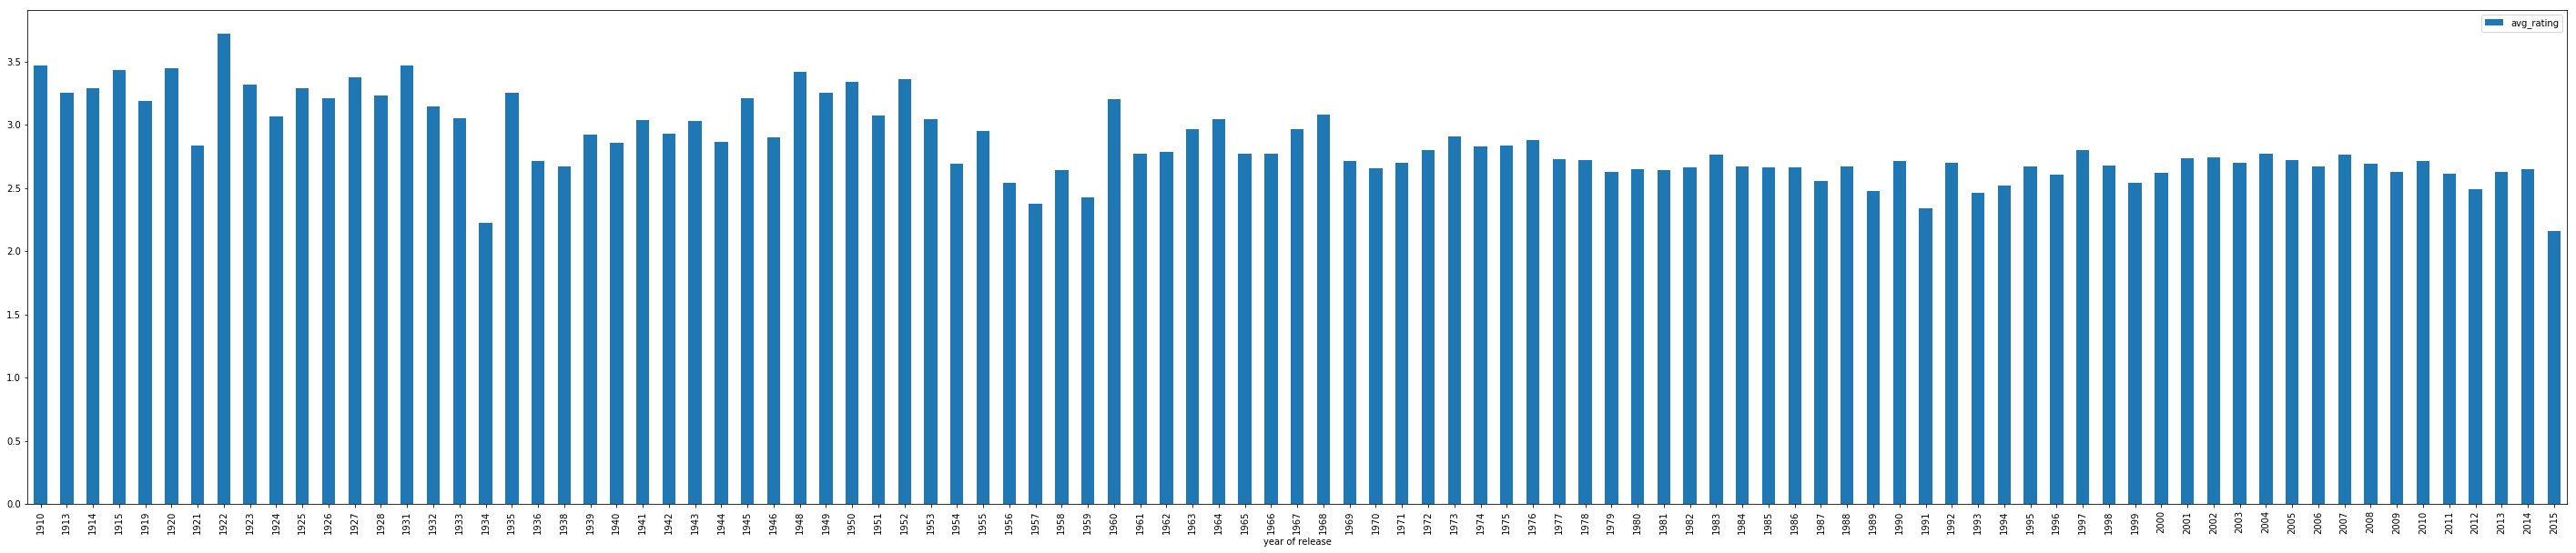

In [40]:
horror_rating_group = horror_rating[['avg_rating','year of release']].groupby('year of release')

horror_rating = horror_rating_group.mean()

horror_rating.head()

horror_rating.plot(kind='bar',figsize=(50,10))

### reading tags.csv file

In [41]:
tags_data = pd.read_csv('tags.csv')

tags_data.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


### checking for null values in tags.csv file

In [42]:
tags_data.isnull().any() #there are some null values in tag column

tags_data.shape # the shape is (465564, 4) before deleting null values

tags_data = tags_data.dropna() #drop null values

tags_data.shape #now after dropping null values shape has changed into (465548, 4)

(465548, 4)

### converting timestamp into python format

In [54]:
tags_data['parsed_time'] = pd.to_datetime(tags_data['timestamp'],unit='s')

del tags_data['timestamp']

tags_data.head()

,userId,movieId,tag,parsed_time
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


### printing all the tags > '2015-01-01'

In [57]:
time_filter = tags_data['parsed_time']>'2015-01-01'

tags_data[time_filter].head()

,userId,movieId,tag,parsed_time
301,318,260,1970s,2015-02-20 22:42:49
302,318,260,fantasy,2015-02-20 22:42:49
303,318,260,sci-fi,2015-02-20 22:42:49
304,318,115149,Action,2015-02-21 15:58:30
305,318,115149,Revenge,2015-02-21 15:58:03


### sorting parsed_time in descending order

In [64]:
tags_data.sort_values(by='parsed_time',ascending=False).head()

,userId,movieId,tag,parsed_time
339178,102853,115149,russian mafia,2015-03-31 03:09:12
158780,46072,6058,premonition,2015-03-31 00:12:44
158763,46072,3409,premonition,2015-03-31 00:12:06
288375,87797,215,Vienna,2015-03-30 22:50:01
290535,88044,106782,profanity,2015-03-30 22:21:36


### reading genome-tags.csv file

In [43]:
genome_tags_data = pd.read_csv('genome-tags.csv')

genome_tags_data.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


### checking null values in genome_tags_data

In [44]:
print(genome_tags_data.isnull().any()) #so there is no null value 

tagId    False
tag      False
dtype: bool


### reading genome-scores.csv file

In [45]:
genome_scores = pd.read_csv('genome-scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


### minimum and maximum relavance

In [46]:
print("minimum relavance : ",genome_scores['relevance'].min())
print("maximum relavance : ",genome_scores['relevance'].max())

minimum relavance :  0.00024999999999997247
maximum relavance :  1.0


### avg relavance according to each movie

In [47]:
avg_relavance = genome_scores[['movieId','relevance']].groupby('movieId').mean()

avg_relavance.head()

,relevance
movieId,
1,0.160223
2,0.119486
3,0.092403
4,0.085427
5,0.098853
